# black friday analysis 

In [32]:
#import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression ,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor ,DecisionTreeClassifier 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data and display information about the data
blackfriday_data = pd.read_csv('BlackFriday.csv')
blackfriday_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
blackfriday_data.shape

(537577, 12)

In [5]:
blackfriday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
blackfriday_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
#Define columns with empty values
blackfriday_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [8]:
blackfriday_data.Product_Category_2.fillna(2.000000,inplace=True)
blackfriday_data.Product_Category_3.fillna(3.000000,inplace=True)

In [9]:
blackfriday_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
blackfriday_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,2.0,3.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,2.0,3.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,3.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,2.0,3.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,3.0,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,3.0,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,2.0,3.0,7172


In [11]:
# Return the number of unique values for each column
blackfriday_data.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [9]:
blackfriday_data.Occupation = blackfriday_data.Occupation.astype('int32')
blackfriday_data.Occupation.dtypes

dtype('int32')

In [10]:
blackfriday_data.Product_Category_1 = blackfriday_data.Product_Category_1.astype('int32')
blackfriday_data.Product_Category_2 = blackfriday_data.Product_Category_2.astype('int32')
blackfriday_data.Product_Category_3 = blackfriday_data.Product_Category_3.astype('int32')

**Now we show the frequency of each value for each column**

In [14]:
blackfriday_data.Gender.value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

In [14]:
blackfriday_data.Marital_Status.value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

In [15]:
blackfriday_data.Age.value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [15]:
blackfriday_data.Occupation.value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

In [17]:
blackfriday_data.Product_Category_3.value_counts()

3     373899
16     32148
15     27611
14     18121
17     16449
5      16380
8      12384
9      11414
12      9094
13      5385
6       4818
18      4563
4       1840
11      1773
10      1698
Name: Product_Category_3, dtype: int64

In [18]:
blackfriday_data.Product_Category_1.value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

In [19]:
blackfriday_data.Product_Category_2.value_counts()

2     215467
8      63058
14     54158
16     42602
15     37317
5      25874
4      25225
6      16251
11     13945
17     13130
13     10369
9       5591
12      5419
10      2991
3       2835
18      2730
7        615
Name: Product_Category_2, dtype: int64

In [20]:
blackfriday_data.City_Category.value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

In [21]:
blackfriday_data.Stay_In_Current_City_Years.value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

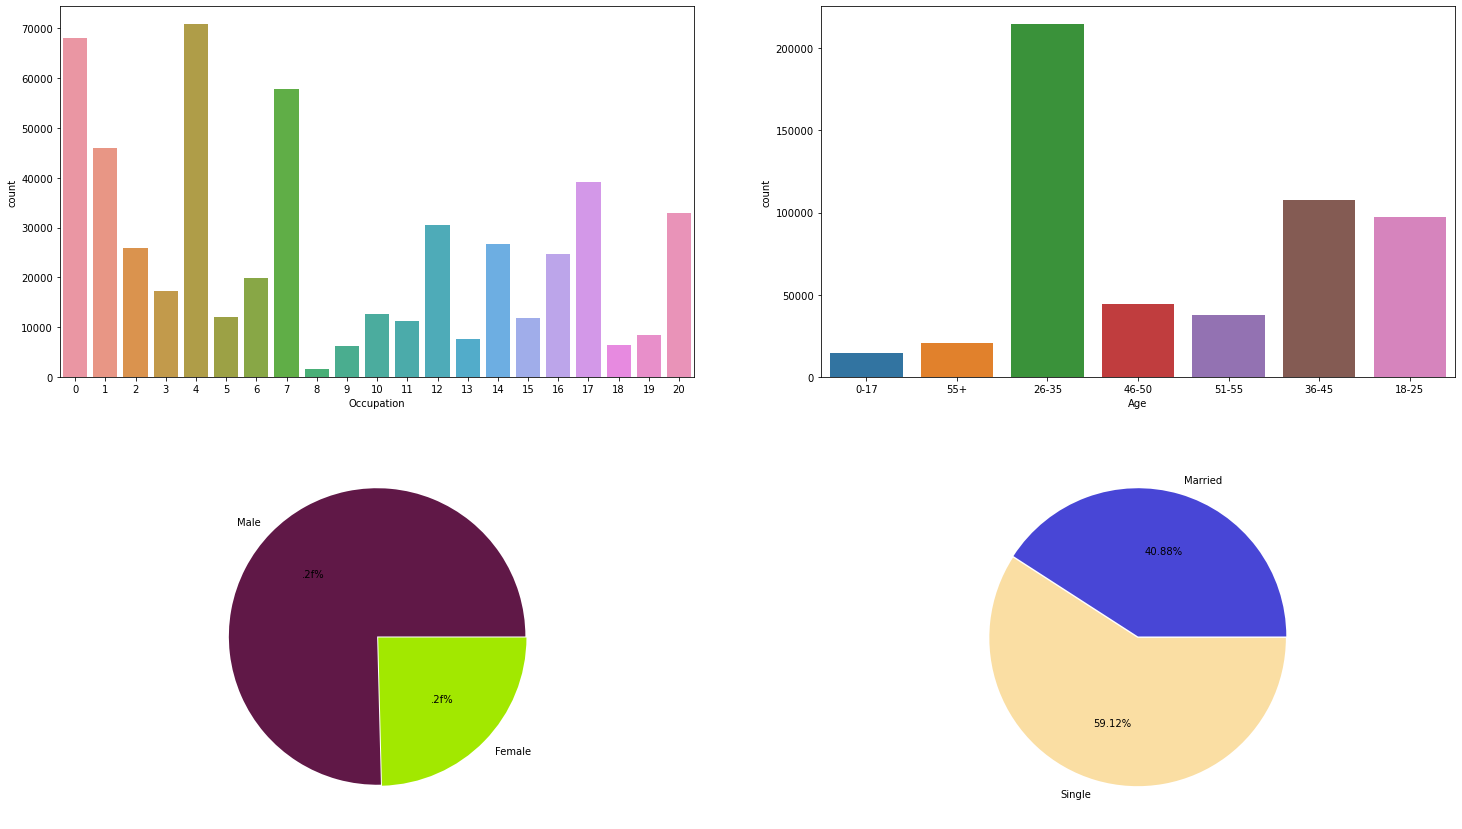

In [22]:
plt.figure(figsize=(25,15))
#pie1
plt.subplot(2,2,3)
male = blackfriday_data.Gender[blackfriday_data.Gender == 'M'].count()
female = blackfriday_data.Gender[blackfriday_data.Gender == 'F'].count()
plt.pie([male,female],labels=['Male','Female'], explode=(0,0.01),autopct=".2f%%",colors=['#601847', '#A2E800'])
#pie2
plt.subplot(2,2,4)
married = blackfriday_data.Marital_Status[blackfriday_data.Marital_Status == 1].count()
single = blackfriday_data.Marital_Status[blackfriday_data.Marital_Status == 0].count()
plt.pie([married,single],labels=['Married','Single'],explode=(0,0.01), autopct="%.2f%%", colors=['#4846D6', '#FADEA3'])

#par chear1
plt.subplot(2,2,2)
sns.countplot(x='Age',data=blackfriday_data)
#par chear2
plt.subplot(2,2,1)
sns.countplot(x='Occupation', label=True,data=blackfriday_data)

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

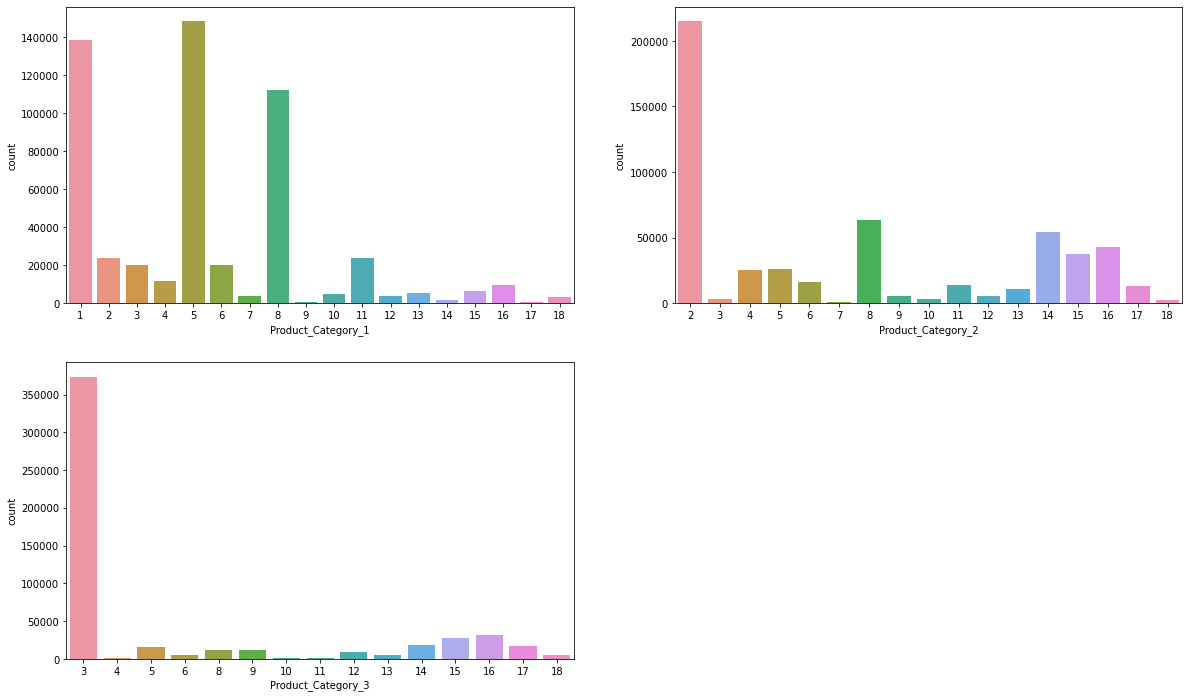

In [23]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot(x='Product_Category_1', data=blackfriday_data)

plt.subplot(2,2,2)
sns.countplot(x='Product_Category_2', data=blackfriday_data)

plt.subplot(2,2,3)
sns.countplot(x='Product_Category_3', data=blackfriday_data)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

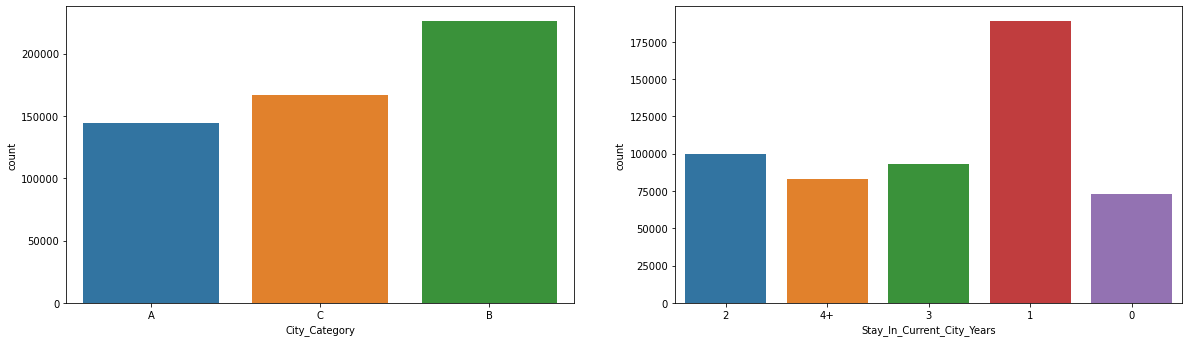

In [25]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot(x='City_Category', data=blackfriday_data)

plt.subplot(2,2,2)
sns.countplot(x='Stay_In_Current_City_Years', data=blackfriday_data)

In [11]:
FEATURES = [col for col in blackfriday_data.columns if col not in ['Purchase', 'User_ID', 'Product_ID']]
cat_features = [col for col in FEATURES if blackfriday_data[col].nunique() < 25]
cont_features = [col for col in FEATURES if blackfriday_data[col].nunique() >= 25]
FEATURES

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [12]:
blackfriday_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,2,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,2,3,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,3,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,2,3,7969


In [13]:
blackfriday_data.drop(['User_ID', 'Product_ID'], axis=1, inplace=True) # non-important Featuers
blackfriday_data.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,2,3,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,2,3,1422


In [14]:
enc = LabelEncoder()
blackfriday_data.Gender = enc.fit_transform(blackfriday_data['Gender'])
blackfriday_data.Age = enc.fit_transform(blackfriday_data['Age'])
blackfriday_data.City_Category = enc.fit_transform(blackfriday_data['City_Category'])
blackfriday_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,2,3,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,2,3,1422
3,0,0,10,0,2,0,12,14,3,1057
4,1,6,16,2,4+,0,8,2,3,7969


In [15]:
blackfriday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      537577 non-null  int32 
 1   Age                         537577 non-null  int32 
 2   Occupation                  537577 non-null  int32 
 3   City_Category               537577 non-null  int32 
 4   Stay_In_Current_City_Years  537577 non-null  object
 5   Marital_Status              537577 non-null  int64 
 6   Product_Category_1          537577 non-null  int32 
 7   Product_Category_2          537577 non-null  int32 
 8   Product_Category_3          537577 non-null  int32 
 9   Purchase                    537577 non-null  int64 
dtypes: int32(7), int64(2), object(1)
memory usage: 26.7+ MB


In [16]:
blackfriday_data.Stay_In_Current_City_Years = blackfriday_data.Stay_In_Current_City_Years.replace('4+', 4)
blackfriday_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,2,3,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,2,3,1422
3,0,0,10,0,2,0,12,14,3,1057
4,1,6,16,2,4,0,8,2,3,7969


In [17]:
blackfriday_data.Marital_Status = blackfriday_data.Marital_Status.astype('int32')
blackfriday_data.Stay_In_Current_City_Years = blackfriday_data.Stay_In_Current_City_Years.astype('int32')

In [18]:
blackfriday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      537577 non-null  int32
 1   Age                         537577 non-null  int32
 2   Occupation                  537577 non-null  int32
 3   City_Category               537577 non-null  int32
 4   Stay_In_Current_City_Years  537577 non-null  int32
 5   Marital_Status              537577 non-null  int32
 6   Product_Category_1          537577 non-null  int32
 7   Product_Category_2          537577 non-null  int32
 8   Product_Category_3          537577 non-null  int32
 9   Purchase                    537577 non-null  int64
dtypes: int32(9), int64(1)
memory usage: 22.6 MB


In [19]:
blackfriday_data.Stay_In_Current_City_Years.unique()

array([2, 4, 3, 1, 0])

In [20]:
blackfriday_data[blackfriday_data.columns[0:]].corr()['Purchase'].sort_values(ascending=False)

Purchase                      1.000000
Product_Category_3            0.270175
City_Category                 0.068507
Gender                        0.060086
Occupation                    0.021104
Age                           0.017717
Product_Category_2            0.006141
Stay_In_Current_City_Years    0.005470
Marital_Status                0.000129
Product_Category_1           -0.314125
Name: Purchase, dtype: float64

In [21]:
blackfriday_data["mean"] = blackfriday_data[FEATURES].mean(axis=1)
blackfriday_data["std"] = blackfriday_data[FEATURES].std(axis=1)
blackfriday_data["min"] = blackfriday_data[FEATURES].min(axis=1)
blackfriday_data["max"] = blackfriday_data[FEATURES].max(axis=1)

In [22]:
blackfriday_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,mean,std,min,max
0,0,0,10,0,2,0,3,2,3,8370,2.222222,3.192874,0,10
1,0,0,10,0,2,0,1,6,14,15200,3.666667,5.196152,0,14
2,0,0,10,0,2,0,12,2,3,1422,3.222222,4.576510,0,12
3,0,0,10,0,2,0,12,14,3,1057,4.555556,5.768689,0,14
4,1,6,16,2,4,0,8,2,3,7969,4.666667,4.924429,0,16


In [23]:
X = blackfriday_data.drop('Purchase', axis=1)
y = blackfriday_data.Purchase

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=30)


In [25]:
#We create a function that makes it easy for us to train and test any model
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")
def model_train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Train= {model_train_score *100}%\n{model_name} model score on Test= {model_test_score*100}%")

In [ ]:
model_RFR =RandomForestRegressor()
model_train(model_RFR,'RandomForestClassifier')
kfolds(model_RFR,'RandomForestClassifier')

RandomForestClassifier model score on Train= 78.74302061017548%
RandomForestClassifier model score on Test= 62.41821034954178%


In [26]:
model_DTR = DecisionTreeRegressor()
model_train(model_DTR,'DecisionTreeRegressor')
kfolds(model_DTR,'DecisionTreeRegressor')

DecisionTreeRegressor model score on Train= 79.89248596008972%
DecisionTreeRegressor model score on Test= 54.52877300964889%
DecisionTreeRegressor score on cross validation: 55.11145979851747%


In [27]:
model_XG = XGBRegressor()
model_train(model_XG, "XGBoost")
kfolds(model_XG, "XGBoost")

XGBoost model score on Train= 66.97402574237228%
XGBoost model score on Test= 65.86199538076798%
XGBoost score on cross validation: 66.14689030878434%


In [28]:
model = LinearRegression()
model_train(model,'LinearRegression')
kfolds(model,'LinearRegression')

LinearRegression model score on Train= 17.68205499760128%
LinearRegression model score on Test= 17.430247383544163%
LinearRegression score on cross validation: 17.614122429235703%


In [30]:
model_GBR = GradientBoostingRegressor()
model_train(model_GBR,'GradientBoostingRegressor')
kfolds(model_GBR,'GradientBoostingRegressor')

GradientBoostingRegressor model score on Train= 63.95999377254482%
GradientBoostingRegressor model score on Test= 63.796906167226844%
GradientBoostingRegressor score on cross validation: 63.93980257943846%


In [34]:
model_L = Lasso()
model_train(model_L,'LassoRegressor')
kfolds(model_L,'LassoRegressor')

LassoRegressor model score on Train= 17.68199267426561%
LassoRegressor model score on Test= 17.429685828113893%
LassoRegressor score on cross validation: 17.614042469553944%


## We find that the best model is XGBRegressor